In [8]:
import os
import cv2
import torch


os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

device = torch.device('cpu')

In [9]:
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True

In [10]:

from nanodet.util import cfg, load_config, Logger

In [11]:

config_path = 'path/to/nanodet/configs/nanodet-m.yml'



model_path = 'path/to/nanodet/weights/nanodet_m.pth'


image_path = 'path/to/image.jpg'


In [12]:
load_config(cfg, config_path)
logger = Logger(-1, use_tensorboard=False)

In [13]:

from demo.demo import Predictor

In [14]:

predictor = Predictor(cfg, model_path, logger, device=device)

model size is  0.5x
init weights...
=> loading pretrained model https://download.pytorch.org/models/shufflenetv2_x0.5-f707e7126e.pth


Finish initialize NanoDet-Plus Head.


In [15]:
meta, res = predictor.inference(image_path)

forward time: 0.323s | decode time: 0.159s | 

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [16]:
from nanodet.util import overlay_bbox_cv

from IPython.display import display
from PIL import Image

In [17]:
def cv2_imshow(a, convert_bgr_to_rgb=True):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if convert_bgr_to_rgb and a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(a))

In [18]:
result = overlay_bbox_cv(meta['raw_img'][0], res[0], cfg.class_names, score_thresh=0.35)


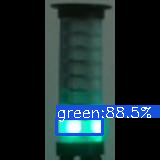

In [19]:
imshow_scale = 1.0
cv2_imshow(cv2.resize(result, None, fx=imshow_scale, fy=imshow_scale))